# Linear Regression Implementation from Scratch



In [0]:

%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

### Generating Data Sets
- Randomly generate $\mathbf{X}\in \mathbb{R}^{1000 \times 2}$
- Use ground truth: weight $\mathbf{w} = [2, -3.4]^\top$ and bias $b = 4.2$
- Generate label by $\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon$ with noise $\epsilon$ obeying a normal distribution with a mean of 0 and a standard deviation of 0.01.

In [0]:
num_inputs = 2
num_examples = 1000
true_w = np.array([2, -3.4])
true_b = 4.2
features = np.random.normal(0, 1, (num_examples, num_inputs))
labels = np.dot(features, true_w) + true_b
labels += np.random.normal(0, 0.01, labels.shape)

### Visualize the Second Feature and Label

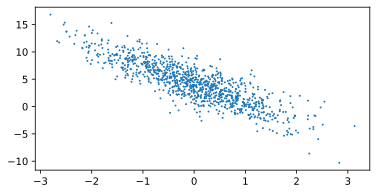

In [5]:
display.set_matplotlib_formats('svg')
plt.figure(figsize=(6, 3))
plt.scatter(features[:, 1], labels, 1);

### Reading Data
Iterate over the data set and return batch_size (batch size) random examples every time.

In [0]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

### Print a Small Data Batch

In [62]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

[[ 0.87582181 -0.93926515]
 [-1.41409777  1.88429096]
 [ 1.37529394  0.37280667]
 [-0.34491432  1.1462004 ]
 [ 0.10675899 -0.00957744]
 [-0.48219111 -1.83813054]
 [ 2.04562947  1.87896608]
 [-0.76132328  0.91492978]
 [-0.20893579 -0.46115253]
 [-0.93831711  0.4444192 ]] 
 [ 9.14285786 -5.0394205   5.69345457 -0.38796026  4.44389826  9.47977438
  1.90086188 -0.44108481  5.33339639  0.80671646]


### Initialize Model Parameters
Weights are initialized to normal random numbers using a mean of 0 and a standard deviation of 0.01, with the bias $b$ set to zero.

In [0]:
w = np.random.normal(0, 0.01, (2,))
b = np.zeros(1)

### Define the Linear Model

In [0]:
def linreg(X, w, b):
    return np.dot(X, w) + b

### Define the Loss Function

In [0]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## Gradient Descent


### Define the Optimization Algorithm

In [0]:
def sgd(params, params_grad, lr, batch_size):
    for param, param_grad in zip(params, params_grad):
        param = param - lr * param_grad / batch_size
    return params

### Training

In [104]:
lr = 0.1  # Learning rate
num_epochs = 5  # Number of iterations
# net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2

w = np.random.normal(0, 0.01, (2, ))
b = np.zeros(1)

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):

        ## Define the Optimization Algorithm
        w_grad = (linreg(X, w, b) - y).dot(X)
        b_grad = np.sum((linreg(X, w, b).reshape(-1) - y))

        w = w - lr * w_grad / batch_size
        b = b - lr * b_grad / batch_size

    train_l = loss(linreg(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean()))

epoch 1, loss 0.000053
epoch 2, loss 0.000053
epoch 3, loss 0.000053
epoch 4, loss 0.000053
epoch 5, loss 0.000053


### Evaluate the Trained Model

In [106]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)
print(w, '\n', true_w)
print(b, '\n', true_b)

Error in estimating w [0.00109475 0.00107936]
Error in estimating b [-0.00129585]
[ 1.99890525 -3.40107936] 
 [ 2.  -3.4]
[4.20129585] 
 4.2


## Analytical Solution

$\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$

In [0]:
xx = np.dot(features.T,features)
xx_inv = np.linalg.pinv(xx)
xy = np.dot(features.T, labels)
w_hat = np.dot(xx_inv, xy)

In [109]:
print(w_hat)

[ 1.96184064 -3.44777633]


How to compute $b$?

In [0]:
b_feature = np.ones(features.shape[0])[...,None]  # None keeps (n, 1) shape
new_features = np.concatenate((features, b_feature), 1)

In [121]:
print(new_features.shape)

(1000, 3)


In [0]:
xx = np.dot(new_features.T,new_features)
xx_inv = np.linalg.pinv(xx)
xy = np.dot(new_features.T, labels)
w_hat = np.dot(xx_inv, xy)

In [123]:
print(w_hat)

[ 1.99922557 -3.40079863  4.2000349 ]
